# MIT-BIH database download and visualization

## Download the database
I list all the possible data urls and use _requests.get_ to download them.  
_(Are there any easier method? This looks a little cumbersome.)_

In [6]:
import requests

for i in list(range(100, 235)):
    for j in list(['.atr', '.dat', '.hea']):
        
        # list all the possible data url
        data_url = 'https://physionet.org/physiobank/database/mitdb/' + str(i) + j
        
        # send a HTTP request to the server and save the response in r
        r = requests.get(data_url)
        
        # check if the url exists
        if r.status_code == 200:
            
            # if the url exists, then save the response content as a data file
            file_name = str(i) + j
            with open(file_name, 'wb') as f:
                f.write(r.content)
        else:
            pass

## Visualize the database
Using WFDB package. https://github.com/MIT-LCP/wfdb-python

> ###   record data 
Record files contain samples of digitized signals. These store the waveforms, but they cannot be interpreted properly without their corresponding header files. These files are in the form: RECORDNAME.dat.
> ### annotation data
MIT Annotation files are binary files containing annotations (labels that generally refer to specific samples in associated signal files). Annotation files should be read with their associated header files. RECORDNAME.atr is an annotation file.

In [1]:
import wfdb
from IPython.display import display

#### Below is a normal record

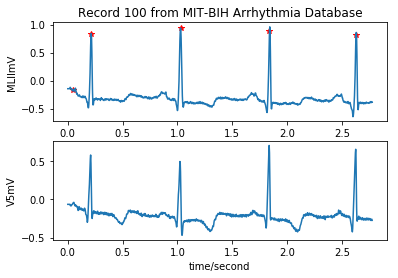

In [46]:
# some parameters
file_name = '100'
sampfrom, sampto = 0, 1000 # sample range
channels = [0, 1]

# Read a WFDB record and return the signal and record descriptors as attributes in a Record object
record = wfdb.rdrecord(file_name, sampfrom = sampfrom, sampto = sampto, channels = channels) 

# Read a WFDB annotation file and return an Annotation object
annotation = wfdb.rdann(file_name, 'atr', sampfrom = sampfrom, sampto = sampto)

# Plot the record along with the annotations
wfdb.plot_wfdb(record = record, annotation = annotation,
               title = 'Record ' + file_name + ' from MIT-BIH Arrhythmia Database',
               time_units = 'seconds')

In [3]:
# display record and annotation attributes
display(record.__dict__)
display(annotation.__dict__)

{'adc_gain': [200.0, 200.0],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [1024, 1024],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [8548, 60086],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'fs': 360,
 'init_value': [995, 1011],
 'n_sig': 2,
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ..., 
        [ 0.71 ,  0.32 ],
        [ 0.795,  0.045],
        [ 0.72 , -0.26 ]]),
 'record_name': '100',
 'samps_per_frame': [1, 1],
 'sig_len': 10000,
 'sig_name': ['MLII', 'V5'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

{'ann_len': 36,
 'aux_note': ['(N\x00',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'chan': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'contained_labels': None,
 'custom_labels': None,
 'description': None,
 'extension': 'atr',
 'fs': 360,
 'label_store': None,
 'num': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'record_name': '100',
 'sample': array([  18,   77,  370,  662,  946, 1231, 1515, 1809, 2044, 2402, 2706,
        2998, 3282, 3560, 3862, 4170, 4466, 4764, 5060, 5346, 5633, 5918,
        6214, 6527, 6823, 7106, 7391, 7670, 7953, 8245, 8539, 8837, 9141,
        9431, 9710, 9998]),
 'subtype': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

#### Below is a abnormal record

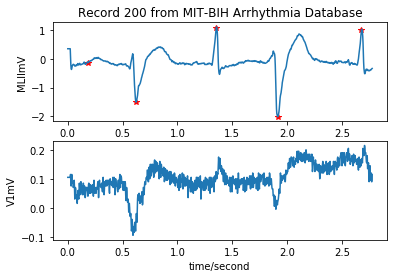

In [45]:
# some parameters
file_name = '200'
sampfrom, sampto = 0, 1000 # sample range
channels = [0, 1]

# Read a WFDB record and return the signal and record descriptors as attributes in a Record object
record = wfdb.rdrecord(file_name, sampfrom = sampfrom, sampto = sampto, channels = channels) 
record.__dict__

# Read a WFDB annotation file and return an Annotation object
annotation = wfdb.rdann(file_name, 'atr', sampfrom = sampfrom, sampto = sampto)

# Plot the record along with the annotations
wfdb.plot_wfdb(record = record, annotation = annotation,
               title = 'Record ' + file_name + ' from MIT-BIH Arrhythmia Database',
               time_units = 'seconds')

In [49]:
display(record.__dict__)
display(annotation.__dict__)

{'adc_gain': [200.0, 200.0],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [1024, 1024],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [44119, 64923],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'fs': 360,
 'init_value': [995, 1011],
 'n_sig': 2,
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ..., 
        [-0.385, -0.26 ],
        [-0.375, -0.26 ],
        [-0.385, -0.275]]),
 'record_name': '100',
 'samps_per_frame': [1, 1],
 'sig_len': 1000,
 'sig_name': ['MLII', 'V5'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

{'ann_len': 5,
 'aux_note': ['(N\x00', '', '', '', ''],
 'chan': array([0, 0, 0, 0, 0]),
 'contained_labels': None,
 'custom_labels': None,
 'description': None,
 'extension': 'atr',
 'fs': 360,
 'label_store': None,
 'num': array([0, 0, 0, 0, 0]),
 'record_name': '100',
 'sample': array([ 18,  77, 370, 662, 946]),
 'subtype': array([0, 0, 0, 0, 0]),
 'symbol': ['+', 'N', 'N', 'N', 'N']}

## Some statistics on the data

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [106]:
records = wfdb.get_record_list('mitdb')

Let's looks at what are the signals names for all the subjects.

In [173]:
sig_names = pd.DataFrame()

for record in records:
    signal, field = wfdb.rdsamp(record)
    sig_names[record] = pd.Series(field['sig_name'], index = ['Channel 1', 'Channel 2'])
    
pd.options.display.max_columns = 999    
sig_names

,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234
Channel 1,MLII,MLII,V5,MLII,V5,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,V5,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII
Channel 2,V5,V1,V2,V2,V2,V1,V1,V1,V1,V1,V1,V1,V1,MLII,V1,V1,V2,V1,V1,V1,V1,V5,V4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1


In [209]:
sig_names.T.apply(pd.value_counts)

,Channel 1,Channel 2
MLII,45.0,1
V1,NaN,40
V2,NaN,4
V4,NaN,1
V5,3.0,2


Result: most of them are 'MLII' or 'V1', only a few are 'V2' - 'V5'

Then let's look at the annotation symbols for all the subjects.

In [178]:
ann_symbols = pd.DataFrame()

for record in records:
    ann = wfdb.rdann(record, 'atr')
    ann_symbols[record] = pd.Series(ann.symbol)
    
ann_symbols

,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234
0,+,+,+,+,+,+,~,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+
1,N,N,/,N,/,N,+,/,N,L,L,N,N,N,N,N,N,R,N,N,N,N,R,V,N,N,~,N,R,F,N,N,R,N,L,N,/,N,N,N,N,N,N,N,R,R,V,N
2,N,N,/,N,/,N,N,/,N,L,L,N,N,N,N,N,N,R,V,N,N,N,R,N,N,N,N,N,V,V,N,N,R,N,L,N,/,N,N,N,N,N,N,N,R,A,N,N
3,N,N,/,N,/,N,N,/,N,L,L,N,N,N,N,N,N,R,N,N,N,N,R,V,N,N,N,N,R,N,N,N,R,N,L,N,/,N,N,V,N,N,N,N,R,A,V,N
4,N,N,/,N,/,N,N,/,N,L,L,N,N,N,N,N,N,R,N,N,N,N,R,N,N,N,N,N,V,F,N,V,R,N,L,N,/,N,N,N,N,N,N,N,R,R,N,N
5,N,N,/,N,/,N,N,/,N,L,L,N,N,N,N,N,N,R,N,N,N,N,R,V,N,N,N,N,R,V,N,N,R,N,L,N,/,N,N,N,N,N,N,N,R,A,N,N
6,N,N,/,N,f,N,N,/,N,L,L,N,N,N,N,N,N,R,N,N,N,N,R,N,N,N,N,N,V,N,N,N,R,N,L,N,f,N,N,V,N,N,N,N,R,A,V,N
7,N,N,/,N,f,N,N,/,N,L,L,N,N,N,N,N,N,R,N,N,N,N,R,V,N,N,N,N,R,V,N,N,R,N,L,N,/,N,N,N,N,N,N,+,"""",~,N,N
8,A,N,/,N,/,N,N,/,N,L,L,N,N,N,N,N,N,R,V,N,N,N,R,N,N,N,N,N,V,V,N,N,R,N,V,N,/,N,N,N,N,N,N,N,R,R,V,N
9,N,N,/,N,/,N,N,/,N,L,L,N,N,N,N,N,N,R,N,N,N,N,R,V,N,N,N,N,R,N,N,N,R,N,L,N,/,N,N,N,N,N,N,N,R,A,N,N


Beat counts by subject and beat type

In [204]:
ann_counts = ann_symbols.apply(pd.value_counts)
ann_counts

,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234
!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,427.0,NaN,NaN,NaN
+,1.0,1.0,5.0,1.0,45.0,1.0,41.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,103.0,1.0,1.0,1.0,13.0,111.0,35.0,8.0,37.0,13.0,23.0,35.0,13.0,15.0,1.0,37.0,23.0,3.0,67.0,21.0,17.0,23.0,128.0,23.0,41.0,201.0,11.0,1.0,53.0,3.0
/,NaN,NaN,2028.0,NaN,1353.0,NaN,NaN,2078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,33.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,2.0,NaN,10.0,NaN,1.0,1.0,92.0,NaN,1.0,NaN,NaN,2.0,16.0,30.0,36.0,NaN,3.0,NaN,NaN,317.0,NaN,NaN,20.0,NaN,3.0,NaN,7.0,94.0,NaN,206.0,61.0,3.0,NaN,1.0,1382.0,6.0,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,1.0,NaN,11.0,NaN,316.0,NaN,9.0,NaN,271.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,10.0,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0
L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2237.0,2123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454.0,NaN,NaN,NaN,NaN,NaN,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N,2239.0,1860.0,99.0,2082.0,163.0,2135.0,1507.0,NaN,1739.0,NaN,NaN,2261.0,1789.0,1820.0,1953.0,2156.0,1534.0,NaN,1543.0,1861.0,2271.0,1515.0,NaN,1416.0,1625.0,2061.0,1821.0,2178.0,NaN,1145.0,1923.0,2063.0,633.0,1790.0,NaN,2147.0,244.0,2046.0,1954.0,1849.0,1712.0,1757.0,1688.0,2070.0,314.0,NaN,1625.0,2211.0


Total counts of different type of beats among all subjects

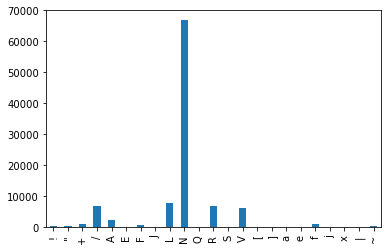

In [213]:
ann_counts.sum(axis=1).plot(kind = 'bar')